<a href="https://colab.research.google.com/github/thoufiqz55/Amazon_seller/blob/main/Amazon_seller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

Loading the dataset

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Dataset/orders_data.xlsx')

In [ ]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [ ]:
data.shape

(171, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


Importing Datetime

In [ ]:
data['year'] = pd.DatetimeIndex(data['order_date']).year
data['date'] = pd.DatetimeIndex(data['order_date']).date
data['time'] = pd.DatetimeIndex(data['order_date']).time
data['month_name'] = pd.DatetimeIndex(data['date']).month_name()
data['day_name'] = pd.DatetimeIndex(data['date']).day_name()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [ ]:
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,year,date,time,month_name,day_name
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer,2021,2021-07-18,22:38:00,July,Sunday
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,2021-10-19,18:05:00,October,Tuesday
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer,2021,2021-11-28,22:20:00,November,Sunday
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer,2021,2021-07-28,04:06:00,July,Wednesday
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer,2021,2021-09-28,14:50:00,September,Tuesday


Checking for the Missing values

In [ ]:
data.isnull().mean()

order_no        0.000000
order_date      0.000000
buyer           0.000000
ship_city       0.000000
ship_state      0.000000
sku             0.000000
description     0.000000
quantity        0.000000
item_total      0.105263
shipping_fee    0.152047
cod             0.725146
order_status    0.000000
year            0.000000
date            0.000000
time            0.000000
month_name      0.000000
day_name        0.000000
dtype: float64

In [ ]:
data_sales=data[['date','item_total']].groupby('date').sum().reset_index()
data_sales.head()

,date,item_total
0,2021-06-13,₹175.00
1,2021-06-16,₹175.00₹175.00₹175.00
2,2021-06-17,₹200.00
3,2021-06-23,₹449.00
4,2021-06-25,0


Removing comma(,) from the values 

In [ ]:
data['ship_city'] = data['ship_city'].apply(lambda x: x.replace(',',''))

In [ ]:
data['item_total'] = data['item_total'].str.replace(',', '')
data['item_total'] = data['item_total'].str.replace('₹', '')
data['item_total'] = data['item_total'].astype(float)

In [ ]:
data['shipping_fee'] = data['shipping_fee'].str.replace(',', '')
data['shipping_fee'] = data['shipping_fee'].str.replace('₹', '')

Filling missing values with mode

In [ ]:
def impute_nan(data,variable,mode):
  data[variable+'_mode']=data[variable].fillna(mode)
  data[variable+'_random']=data[variable]
  random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
  random_sample.index=data[data[variable].isnull()].index
  data.loc[data[variable].isnull(),variable+'_random']=random_sample

In [ ]:
mode=data.item_total.mode()

In [ ]:
impute_nan(data,'item_total',mode)

In [ ]:
impute_nan(data,'shipping_fee',mode)

In [ ]:
data['cod'].fillna('Online',inplace = True)

In [ ]:
data.columns

Index(['order_no', 'order_date', 'buyer', 'ship_city', 'ship_state', 'sku',
       'description', 'quantity', 'item_total', 'shipping_fee', 'cod',
       'order_status', 'year', 'date', 'time', 'month_name', 'day_name',
       'item_total_mode', 'item_total_random', 'shipping_fee_mode',
       'shipping_fee_random'],
      dtype='object')

Removing unnecessary columns

In [ ]:
df=data.drop(['order_no','order_date','buyer','ship_state','sku','description','item_total','shipping_fee',
                'date','time','item_total_mode','shipping_fee_mode'],axis=1)

In [ ]:
df.head()

,ship_city,quantity,cod,order_status,year,month_name,day_name,item_total_random,shipping_fee_random
0,CHANDIGARH,1,Online,Delivered to buyer,2021,July,Sunday,449.0,84.96
1,PASIGHAT,1,Online,Delivered to buyer,2021,October,Tuesday,449.0,60.18
2,PASIGHAT,1,Online,Delivered to buyer,2021,November,Sunday,449.0,60.18
3,DEVARAKONDA,1,Cash On Delivery,Delivered to buyer,2021,July,Wednesday,399.0,84.96
4,MUMBAI,1,Online,Delivered to buyer,2021,September,Tuesday,1099.0,84.96


Taking all categoricla features in a list

In [ ]:
categorical=df.select_dtypes('object').columns.tolist()
categorical

['ship_city',
 'cod',
 'order_status',
 'month_name',
 'day_name',
 'shipping_fee_random']

Label Encoding for categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in categorical:
  df[i]=encoder.fit_transform(df[i])

In [ ]:
df['order_status'].value_counts()

0    160
1     11
Name: order_status, dtype: int64

In [ ]:
x=df.drop('order_status',axis=1)
y=df['order_status']

In [ ]:
df.head()

,ship_city,quantity,cod,order_status,year,month_name,day_name,item_total_random,shipping_fee_random
0,13,1,1,0,2021,4,3,449.0,12
1,56,1,1,0,2021,7,5,449.0,8
2,56,1,1,0,2021,6,3,449.0,8
3,18,1,0,0,2021,4,6,399.0,12
4,47,1,1,0,2021,8,5,1099.0,12


Checking the target data for balancing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


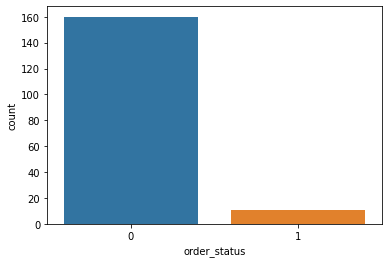

In [ ]:
sns.countplot(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

Applying RandomOverSampler for balancing the data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
x_os,y_os=os.fit_resample(x,y)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_os))

Counter({0: 160, 1: 11})
Counter({0: 160, 1: 120})


In [ ]:
# import seaborn as sns
# sns.countplot(y_os)

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm=SMOTE()
# x_os,y_os=sm.fit_resample(x,y)

After balancing

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


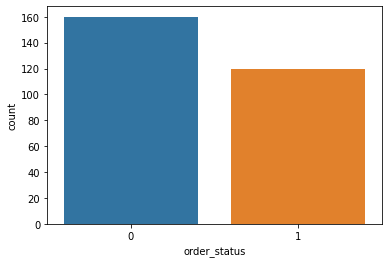

In [ ]:
sns.countplot(y_os)

Using Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_os,y_os,test_size=.20,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((224, 8), (224,), (56, 8), (56,))

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,precision_score,recall_score

Applying RandomForestClassifier algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,random_state=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

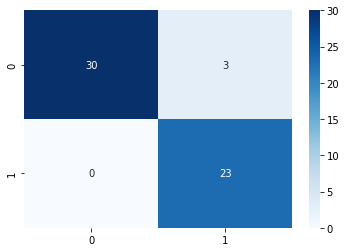

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.88      1.00      0.94        23

    accuracy                           0.95        56
   macro avg       0.94      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



Prediction

In [ ]:
df=pd.DataFrame(y_test,columns=['order_status'])

df['Predicted']=y_pred
df.head(10)

,order_status,Predicted
33,0,0
108,0,0
240,1,1
259,1,1
154,0,0
9,0,0
146,0,0
203,1,1
144,0,0
155,0,0
